<a href="https://colab.research.google.com/github/priaJuli/IR_Pilkada2017/blob/main/NB_emoticon_test_pilkada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import re
import numpy as np
import pandas as pd

pd.options.display.max_colwidth = 300

In [2]:
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
# nltk
# from nltk.stem import WordNetLemmatizer

from nltk.stem import PorterStemmer 
   
ps = PorterStemmer() 

In [4]:
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [5]:
url = 'https://raw.githubusercontent.com/priaJuli/IR_research/main/dataset_tweet_sentiment_pilkada_DKI_2017.csv'

url_emoticon = 'https://raw.githubusercontent.com/FLAIST/emosent-py/master/emosent/data/Emoji_Sentiment_Data_v1.0.csv'

# Importing the dataset
DATASET_COLUMNS=['Id','target','Pasangan Calon','text']
# ['target','ids','date','flag','user','text']
emoticon_columns = ['Emoji','Unicode' 'codepoint','Unicode name']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv(url, names=DATASET_COLUMNS, skiprows=[0])

df_emo = pd.read_csv(url_emoticon)

df["target"] = (df['target'] == "positive").astype(int)

print(df.head())

df_emo['Unicode name'] = df_emo['Unicode name'].str.lower()

dictionary_emoticons = df_emo['Unicode name'].values

dict_emoticons_replace = df_emo['Emoji'].values

# print(df_emo['Unicode name'].head())

# print(df_emo['Emoji'])

print(dictionary_emoticons[0:5])

print(dict_emoticons_replace[0:5])

   Id  ...                                                                                                                                     text
0   1  ...  Banyak akun kloning seolah2 pendukung #agussilvy mulai menyerang paslon #aniessandi dengan opini dan argumen pmbenaran..jangan terkecoh
1   2  ...                                                                         #agussilvy bicara apa kasihan yaa...lap itu air matanya wkwkwkwk
2   3  ...             Kalau aku sih gak nunggu hasil akhir QC tp lagi nunggu motif cuitan pak @SBYudhoyono kayak apa.. pasca #AgusSilvy Nyungsep..
3   4  ...           Kasian oh kasian dengan peluru 1milyar untuk tiap RW #agussilvy tidak mempan menangin pilkada #QuickCount #PilkadaSerentak2017
4   5  ...                                              Maaf ya pendukung #AgusSilvy..hayo dukung #AniesSandi diputaran 2 @ronavioleta @NetizenTofa

[5 rows x 4 columns]
['face with tears of joy' 'heavy black heart' 'black heart suit'
 'smiling face with heart

In [6]:

df.sample(5)


,Id,target,Pasangan Calon,text
663,664,0,Anies-Sandi,"Sudah Curang, Kalah, itulah kekalahan yang sangat menyakitkan, Tidak bermartabat dan memalukan #politiksembako #pilkadajakarta #AniesSandi"
837,838,1,Anies-Sandi,Polda Diminta Objektif Selidiki Kasus Sandiaga Uno http://merahputih.com/ #merahputih #sandiagauno #aniesSandi #jakarta
863,864,1,Anies-Sandi,<OK HAND> <OK HAND> <OK HAND> #aniessandi #pilkadaDKI #pilkadaDKI2017 #majukotanyabahagiawarganya #prabowosubianto #pks https://www.instagram.com/p/BS7
871,872,1,Anies-Sandi,#aniessandy #gubenurgur3 <OK HAND> <OK HAND> <OK HAND>
379,380,0,Ahok-Djarot,#KaranganBungaAhok biarlah mereka menghibur diri...wkkwwkkwk. #AhokDjarot #ahokbali1


In [7]:
df.columns

Index(['Id', 'target', 'Pasangan Calon', 'text'], dtype='object')

In [8]:
print('length of data is', len(df))

length of data is 900


In [9]:
df.shape

(900, 4)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              900 non-null    int64 
 1   target          900 non-null    int64 
 2   Pasangan Calon  900 non-null    object
 3   text            900 non-null    object
dtypes: int64(2), object(2)
memory usage: 28.2+ KB


In [11]:
df.dtypes

Id                 int64
target             int64
Pasangan Calon    object
text              object
dtype: object

In [12]:
df.isnull().sum()

Id                0
target            0
Pasangan Calon    0
text              0
dtype: int64

In [13]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:     ', len(df))

Count of columns in the data is:   4
Count of rows in the data is:      900


In [14]:
df['target'].unique()

array([0, 1])

In [15]:
df['target'].nunique()

2

         Id  Pasangan Calon  text
target                           
0       450             450   450
1       450             450   450


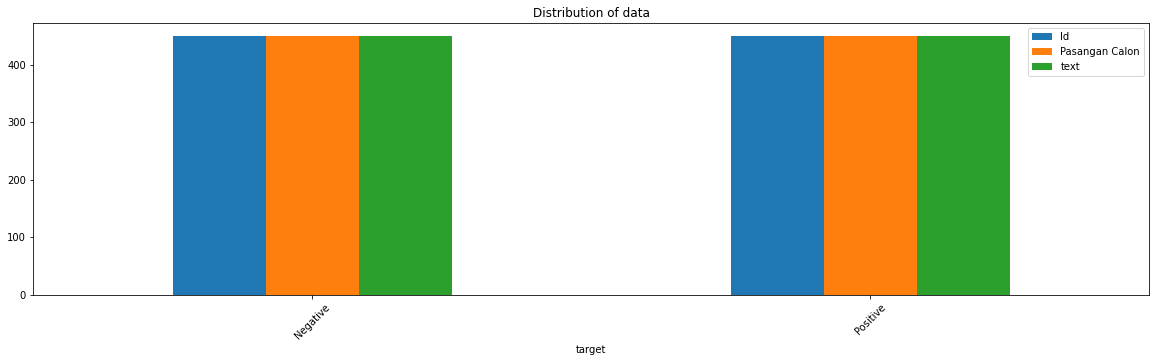

In [16]:
# Plotting the distribution for dataset.
print(df.groupby('target').count())
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=True,figsize=(20, 5))
ax.set_xticklabels(['Negative','Positive'], rotation=45)
# for p in ax.patches:
    # ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
# Storing data in lists.
text, sentiment = list(df['text']), list(df['target'])

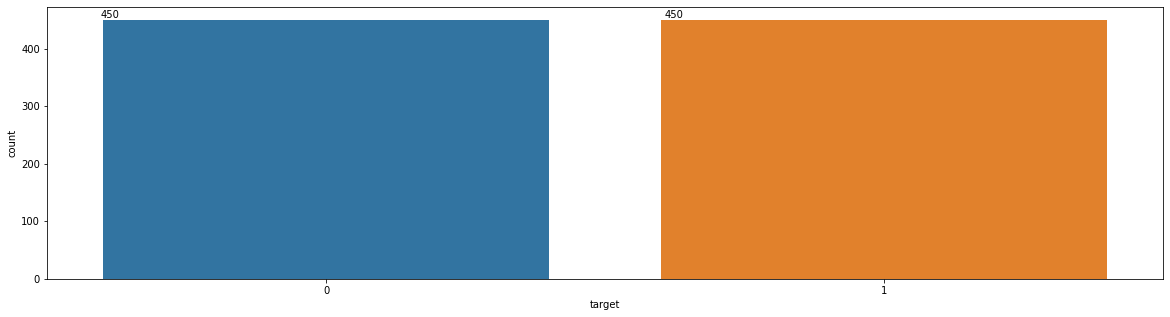

In [17]:
import seaborn as sns
plt.figure(figsize = (20,5))
ax=sns.countplot(x='target', data=df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

In [18]:
data=df[['text','target']]
data.head()

,text,target
0,Banyak akun kloning seolah2 pendukung #agussilvy mulai menyerang paslon #aniessandi dengan opini dan argumen pmbenaran..jangan terkecoh,0
1,#agussilvy bicara apa kasihan yaa...lap itu air matanya wkwkwkwk,0
2,Kalau aku sih gak nunggu hasil akhir QC tp lagi nunggu motif cuitan pak @SBYudhoyono kayak apa.. pasca #AgusSilvy Nyungsep..,0
3,Kasian oh kasian dengan peluru 1milyar untuk tiap RW #agussilvy tidak mempan menangin pilkada #QuickCount #PilkadaSerentak2017,0
4,Maaf ya pendukung #AgusSilvy..hayo dukung #AniesSandi diputaran 2 @ronavioleta @NetizenTofa,0


In [19]:
data['target'] = data['target'].replace(4,1)
data['target'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


1    450
0    450
Name: target, dtype: int64

In [20]:
data['target'].unique()

array([0, 1])

In [21]:
data_pos = data[data['target'] == 1]
data_pos.head()
print(len(data_pos))

450


In [22]:
data_neg = data[data['target'] == 0]
data_neg.head()
print(len(data_neg))

450


In [23]:
data_pos = data_pos.iloc[:]
data_neg = data_neg.iloc[:]
print(type(data_pos))
print(type(data_neg))
dataset = pd.concat([data_pos, data_neg])
dataset
dataset.head()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


,text,target
150,Doa ku.. Semoga suaranya mas Agus-Sylvi beneran ke #Badja #PilkadaDKI2017 yakin kan mas Agus.. Aku pada mu..,1
151,"Terima kasih mas @AgusYudhoyono, karenamu anak muda telah berani menyuarakan perubahan. Kami tetap bersamamu #YNWA",1
152,KETEMU DI ISTIQLAL Bangga Pernah Jadi Bagian Dari @AgusYudhoyono dan @sylviana_murni @ZaraZettiraZr @AhyCenter @SohibAHY,1
153,"Tersingkir dari kancah pilkada DKI, rupanya ada cara lain untuk mengangkat seseorang #AHY Mendunia",1
154,"Dalam Pilkada DKI, AHY juga mampu menunjukkan kualitasnya sebagai seorang pemimpin muda yang berjiwa ksatria. (AHY mendunia)",1


In [24]:
dataset['text']=dataset['text'].str.lower()
print(dataset['text'][13])
print(dataset['text'][210])
print(dataset['text'][305])
print(dataset['text'][373])
print(dataset['text'][552])

dataset['text'].sample(5)

aku juga kemarin #ahy 19april2017 suaraku utk paslon 3 #dki
salam untuk kaum muda. hormat pada yang tua. #ahy
ahok menang tipis di tps tempat habib rizieq mencoblos https://goo.gl/fb/4fdytd  #seruji #fokus #pilkadadki2017
hati hati komentar tentang #ahokdjarot #kalahpilkada, ujung2nya anda dituduh nyinyir
#duajari #ahokdjarot #badja #salamduajari #duajari #kode #code #gangster #farmer #foodhero https://www.instagram.com/p/bs1x10_bovd/


168                                                                           pilkada dki berdoa ahy menang. mudah-mudahan anies sandi yang menang.
37      sayang mayor #ahy termasuk yang dikader untuk pemimpin masa depan dari sma taruna beliau selalu yang teratas lagi2 itu pilihan #pensiundini
414                sembako murah ala timses ahok-djarot langgar uu pemilu http://m.viva.co.id  suap suara model begini, menghina kecerdasan warga..
635    jangan kotori lagi balai kota dengan karangan bunga http://obsessionnews.com @habiburokhman #ahokdjarot #ahok #anies #aniessandi #mayday2017
133                    aku bangga jadi anak memo.  <tongue>   <face with stuck-out tongue & closed eyes>  <face with tears of joy>    #ahy #moshing
Name: text, dtype: object

In [25]:
!pip install Sastrawi

In [26]:
# print(dataset['text'][305])
# print(dataset['text'][564])

# a_string = "this is a <ki_te2> <ki_te1> message"
# result = re.findall(r"\<([A-Za-z0-9_]+)\>", a_string)
# print("".join(result))

# print(dictionary_emoticons[0:5])
# print(dict_emoticons_replace[0:5])

for idx in range(len(dictionary_emoticons)):
  dict_emoji = "<{}>".format(dictionary_emoticons[idx])
  dictionary_emoticons[idx] = dict_emoji
  # print(dict_emoji)
  emoji_replace = dict_emoticons_replace[idx]
  dataset['text'] = dataset['text'].replace(dict_emoji, emoji_replace, regex=True)

# dataset['text'] = dataset['text'].replace("<face without mouth>", "LOL", regex=True)
print(dataset['text'][305])
print(dataset['text'][564])
print(dataset['text'][725])

ahok menang tipis di tps tempat habib rizieq mencoblos https://goo.gl/fb/4fdytd  #seruji #fokus #pilkadadki2017
saya percaya, kondisi cuaca beberapa hari sebelum pilkada dki ikut serta memberikan kontribusi positif ke ahok-djarot. aku 2!! ✌ ✌
dan nginulpun terdiam 😶 . #dacademy4 salam #okeoce, #coblospecinya


In [27]:
def get_emoticon(text):
    values = " ".join([word for word in str(text).split() if word in dict_emoticons_replace])
    values = " "+values
    return values

dataset['only_emoji'] = dataset['text'].apply(lambda text: get_emoticon(text))
print(dataset['only_emoji'][725])
print(dataset['text'][305])
print(dataset['text'][564])
print(dataset['text'][725])

 😶
ahok menang tipis di tps tempat habib rizieq mencoblos https://goo.gl/fb/4fdytd  #seruji #fokus #pilkadadki2017
saya percaya, kondisi cuaca beberapa hari sebelum pilkada dki ikut serta memberikan kontribusi positif ke ahok-djarot. aku 2!! ✌ ✌
dan nginulpun terdiam 😶 . #dacademy4 salam #okeoce, #coblospecinya


In [28]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from nltk.tokenize import word_tokenize 
 

stop_factory = StopWordRemoverFactory().get_stop_words()
print(stop_factory)

['yang', 'untuk', 'pada', 'ke', 'para', 'namun', 'menurut', 'antara', 'dia', 'dua', 'ia', 'seperti', 'jika', 'jika', 'sehingga', 'kembali', 'dan', 'tidak', 'ini', 'karena', 'kepada', 'oleh', 'saat', 'harus', 'sementara', 'setelah', 'belum', 'kami', 'sekitar', 'bagi', 'serta', 'di', 'dari', 'telah', 'sebagai', 'masih', 'hal', 'ketika', 'adalah', 'itu', 'dalam', 'bisa', 'bahwa', 'atau', 'hanya', 'kita', 'dengan', 'akan', 'juga', 'ada', 'mereka', 'sudah', 'saya', 'terhadap', 'secara', 'agar', 'lain', 'anda', 'begitu', 'mengapa', 'kenapa', 'yaitu', 'yakni', 'daripada', 'itulah', 'lagi', 'maka', 'tentang', 'demi', 'dimana', 'kemana', 'pula', 'sambil', 'sebelum', 'sesudah', 'supaya', 'guna', 'kah', 'pun', 'sampai', 'sedangkan', 'selagi', 'sementara', 'tetapi', 'apakah', 'kecuali', 'sebab', 'selain', 'seolah', 'seraya', 'seterusnya', 'tanpa', 'agak', 'boleh', 'dapat', 'dsb', 'dst', 'dll', 'dahulu', 'dulunya', 'anu', 'demikian', 'tapi', 'ingin', 'juga', 'nggak', 'mari', 'nanti', 'melainkan', '

In [29]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in stop_factory])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))

print(dataset['text'][305])
print(dataset['text'][552])

dataset['text'].sample(5)

ahok menang tipis tps tempat habib rizieq mencoblos https://goo.gl/fb/4fdytd #seruji #fokus #pilkadadki2017
#duajari #ahokdjarot #badja #salamduajari #duajari #kode #code #gangster #farmer #foodhero https://www.instagram.com/p/bs1x10_bovd/


648    walupun bukan orangjakarta, pernah menyesal rugi dukung #aniessandi ayo kapan bagi2 uang&sembako non pilkada??pret
316                                    rumit membedakan hitam putih #pilkadadki2017 sangat jelas siapa paling doyan gaduh
875         @kompastv sayang #aniessandy datang, kalau datang acaranya tambah keren <ok hand> <ok hand> #ahokdjarotdirosi
631                       #pilkadadki2017 anies dipolisikan sebut #ahok-djarot gusur 300 titik dki http://detik.id/6lraph
630                 didiklah orang muda akhlak integritas. bukan ambisi kotor fitnah. jangan omong doang. #pilkadadki2017
Name: text, dtype: object

In [30]:
def cleaning_URLs(data):
    return re.sub('http[s]?://\S+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))

print(dataset['text'][305])
print(dataset['text'][552])

dataset['text'].head()



ahok menang tipis tps tempat habib rizieq mencoblos  #seruji #fokus #pilkadadki2017
#duajari #ahokdjarot #badja #salamduajari #duajari #kode #code #gangster #farmer #foodhero 


150            doa ku.. semoga suaranya mas agus-sylvi beneran #badja #pilkadadki2017 yakin kan mas agus.. aku mu..
151         terima kasih mas @agusyudhoyono, karenamu anak muda berani menyuarakan perubahan. tetap bersamamu #ynwa
152    ketemu istiqlal bangga pernah jadi bagian @agusyudhoyono @sylviana_murni @zarazettirazr @ahycenter @sohibahy
153                                  tersingkir kancah pilkada dki, rupanya cara mengangkat seseorang #ahy mendunia
154            pilkada dki, ahy mampu menunjukkan kualitasnya seorang pemimpin muda berjiwa ksatria. (ahy mendunia)
Name: text, dtype: object

In [31]:
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))

print(dataset['text'][305])
print(dataset['text'][552])

dataset['text'].sample(5)


ahok menang tipis tps tempat habib rizieq mencoblos  seruji fokus pilkadadki2017
duajari ahokdjarot badja salamduajari duajari kode code gangster farmer foodhero 


0      banyak akun kloning seolah2 pendukung agussilvy mulai menyerang paslon aniessandi opini argumen pmbenaranjangan terkecoh
849              saran aniessandi reklamasi dpt dibatalkan dibicarakan pemerintah pusat kspgoid kemaritiman kkpgoid kejaksaanri
156       12 ahy justru menitipkan pentingnya menjaga pluralisme kebangsaan kesatuan persaingan pilkada persatuan lebih penting
735                       mau berpihak sama ormas abal abal fitsahats firzahots okeoce salambersama tetapahok kampanyeahokjahat
635                          jangan kotori balai kota karangan bunga  habiburokhman ahokdjarot ahok anies aniessandi mayday2017
Name: text, dtype: object

In [32]:

def cleaning_repeating_char(text):
    return ' '.join(dict.fromkeys(text.split()))
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
print(dataset['text'][305])
print(dataset['text'][552])


ahok menang tipis tps tempat habib rizieq mencoblos seruji fokus pilkadadki2017
duajari ahokdjarot badja salamduajari kode code gangster farmer foodhero


In [33]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
print(dataset['text'][13])
print(dataset['text'][210])
print(dataset['text'][305])
print(dataset['text'][373])
print(dataset['text'][725])
dataset['text'].head()

aku kemarin ahy april suaraku utk paslon  dki
salam kaum muda hormat tua ahy
ahok menang tipis tps tempat habib rizieq mencoblos seruji fokus pilkadadki
hati komentar ahokdjarot kalahpilkada ujungnya dituduh nyinyir
nginulpun terdiam 😶 dacademy salam okeoce coblospecinya


150                       doa ku semoga suaranya mas agussylvi beneran badja pilkadadki yakin kan agus aku mu
151       terima kasih mas agusyudhoyono karenamu anak muda berani menyuarakan perubahan tetap bersamamu ynwa
152    ketemu istiqlal bangga pernah jadi bagian agusyudhoyono sylvianamurni zarazettirazr ahycenter sohibahy
153                              tersingkir kancah pilkada dki rupanya cara mengangkat seseorang ahy mendunia
154              pilkada dki ahy mampu menunjukkan kualitasnya seorang pemimpin muda berjiwa ksatria mendunia
Name: text, dtype: object

In [34]:
import nltk
st = nltk.PorterStemmer()

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
st = factory.create_stemmer()

def stemming_on_text(data):
    return st.stem(data)
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))

print(dataset['text'][13])
print(dataset['text'][210])
print(dataset['text'][305])
print(dataset['text'][373])
print(dataset['text'][552])

dataset['text'].head()



aku kemarin ahy april suara utk paslon dki
salam kaum muda hormat tua ahy
ahok menang tipis tps tempat habib rizieq coblos ruji fokus pilkadadki
hati komentar ahokdjarot kalahpilkada ujung tuduh nyinyir
duajari ahokdjarot badja salamduajari kode code gangster farmer foodhero


150                          doa ku moga suara mas agussylvi beneran badja pilkadadki yakin kan agus aku mu
151                       terima kasih mas agusyudhoyono karena anak muda berani suara ubah tetap sama ynwa
152    ketemu istiqlal bangga pernah jadi bagi agusyudhoyono sylvianamurni zarazettirazr ahycenter sohibahy
153                                             singkir kancah pilkada dki rupa cara angkat orang ahy dunia
154                              pilkada dki ahy mampu tunjuk kualitas orang pimpin muda jiwa ksatria dunia
Name: text, dtype: object

In [35]:
# import nltk

# nltk.download('wordnet')
# from nltk.stem import WordNetLemmatizer 

# # Init the Wordnet Lemmatizer
# lm = WordNetLemmatizer()

# def lemmatizer_on_text(data):
#     text = [lm.lemmatize(word) for word in data]
#     return data
# dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))

# print(dataset['text'][305])
# print(dataset['text'][552])
# print(dataset['text'][564])
# print(dataset['text'][725])

# dataset['text'].head()

In [36]:
# print(dataset['only_emoji'].head())

# print(dataset['only_emoji'])

dataset['text'] = dataset['text'].str.cat(dataset['only_emoji'], join="left")

print(dataset['text'][711])
print(dataset['text'][120])
print(dataset['text'][712])
print(dataset['text'][373])
print(dataset['text'][725])

jadi kalo kalah badja buat curang picik prabowo sebut aniessandi menang pilkada dki curang 😬
ahy anieshilangya ahokdjarotdirosi kompastv rosiannahi sittayohag gunawanahokers gunjkt partaisocmed ulinyusron 😬 😬
waktu kampanye sandi malah cianjur anies minta dukung aher hhmm jabar siap landa aniessandi zippermouth face kalah pilkada 
hati komentar ahokdjarot kalahpilkada ujung tuduh nyinyir 
nginulpun diam dacademy salam okeoce coblospecinya 😶


In [37]:


X=dataset.text
X.sample(5)
y=dataset.target
y.sample(5)

854    1
559    1
478    1
618    0
436    0
Name: target, dtype: int64

In [38]:
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42)
# X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [39]:
print(X[725])
# vectoriser = TfidfVectorizer(ngram_range=(1,1), max_features=50000)
# vectoriser.fit(X)
# print('No. of feature_words: ', len(vectoriser.get_feature_names()))
vectoriser = TfidfVectorizer(ngram_range=(1,1), max_features=50000, token_pattern=r'[^\s]+')
vectoriser.fit(X)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))
print(vectoriser.get_feature_names())

nginulpun diam dacademy salam okeoce coblospecinya 😶
No. of feature_words:  2857
['a', 'aa', 'aagym', 'aamiin', 'abaaah', 'abal', 'abang', 'abdi', 'abis', 'absurd', 'abunawas', 'aburizal', 'abused', 'acara', 'acu', 'ada', 'adaaqua', 'addiems', 'adekku', 'adil', 'adjierimbawan', 'adjrot', 'agam', 'agama', 'agamaras', 'agus', 'agusharimurtiyudhoyono', 'agussilvy', 'agussilvyhayo', 'agussylvi', 'agusyudhoyono', 'ah', 'aher', 'ahhhh', 'ahli', 'ahmadfuadanwar', 'ahok', 'ahokbali', 'ahokbtp', 'ahokdicintairakyat', 'ahokdjarot', 'ahokdjarotdirosi', 'ahokdjarotlebihbaik', 'ahokdjarotmenang', 'ahoker', 'ahokers', 'ahokforbali', 'ahokfornobel', 'ahokfree', 'ahokhebat', 'ahokishope', 'ahokjarot', 'ahokkalah', 'ahokkeok', 'ahoklovers', 'ahokmandikembang', 'ahokmartir', 'ahokmenang', 'ahokpanikahokkalah', 'ahokpenistaagama', 'ahokpresidenrike', 'ahokrekormuri', 'ahokri', 'ahokselaludihati', 'ahokshow', 'ahoktakbersalah', 'ahoktumbang', 'ahox', 'ahy', 'ahyall', 'ahyangarukkepala', 'ahycenter', 'ahyc

In [40]:
# X_train = vectoriser.transform(X_train)
# X_train

In [41]:
# X_test  = vectoriser.transform(X_test)
# X_test


In [42]:
def model_Evaluate(model,X_test,y_test):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred))
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    # print(cf_matrix)
    categories = ['Negative','Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    group_percentages = ['{0:.4%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    # print(group_percentages)
    labels = [f'{v1} : {v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

Ratio 10% to 90%
              precision    recall  f1-score   support

           0       0.79      0.62      0.69        42
           1       0.72      0.85      0.78        48

    accuracy                           0.74        90
   macro avg       0.75      0.74      0.74        90
weighted avg       0.75      0.74      0.74        90

Accuracy 0.7444444444444445


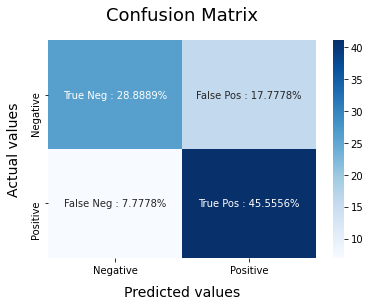

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.1, random_state =42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train = vectoriser.transform(X_train)
X_train

X_test  = vectoriser.transform(X_test)
X_test

print("Ratio 10% to 90%")
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel,X_test,y_test)
y_pred1 = BNBmodel.predict(X_test)

cf_matrix10 = accuracy_score(y_test, y_pred1)
print("Accuracy {}".format(cf_matrix10))

Ratio 20% to 80%
              precision    recall  f1-score   support

           0       0.84      0.62      0.71        86
           1       0.72      0.89      0.80        94

    accuracy                           0.76       180
   macro avg       0.78      0.75      0.75       180
weighted avg       0.78      0.76      0.76       180

Accuracy 0.7611111111111111


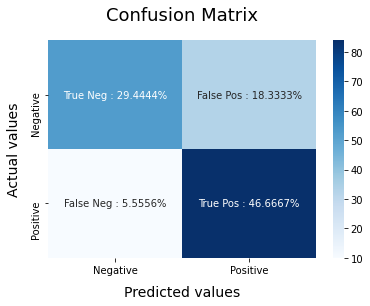

In [44]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state =42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train = vectoriser.transform(X_train)
X_train

X_test  = vectoriser.transform(X_test)
X_test


BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
print("Ratio 20% to 80%")
model_Evaluate(BNBmodel,X_test,y_test)
y_pred1 = BNBmodel.predict(X_test)

cf_matrix20 = accuracy_score(y_test, y_pred1)
print("Accuracy {}".format(cf_matrix20))

Ratio 30% to 70%
              precision    recall  f1-score   support

           0       0.86      0.61      0.71       129
           1       0.72      0.91      0.80       141

    accuracy                           0.77       270
   macro avg       0.79      0.76      0.76       270
weighted avg       0.79      0.77      0.76       270

Accuracy 0.7666666666666667


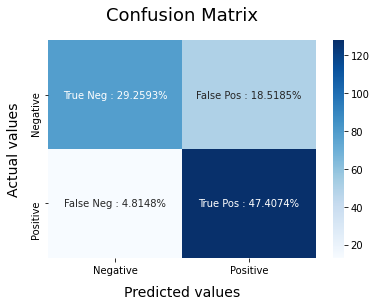

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train = vectoriser.transform(X_train)
X_train

X_test  = vectoriser.transform(X_test)
X_test

print("Ratio 30% to 70%")
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel,X_test,y_test)
y_pred1 = BNBmodel.predict(X_test)

cf_matrix30 = accuracy_score(y_test, y_pred1)
print("Accuracy {}".format(cf_matrix30))

Ratio 40% to 60%
              precision    recall  f1-score   support

           0       0.79      0.60      0.68       169
           1       0.71      0.86      0.78       191

    accuracy                           0.74       360
   macro avg       0.75      0.73      0.73       360
weighted avg       0.75      0.74      0.73       360

Accuracy 0.7388888888888889


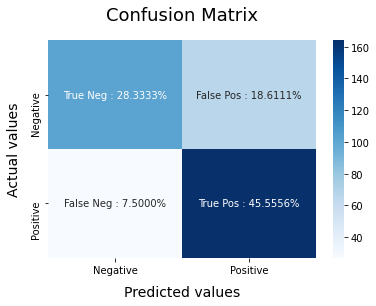

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.4, random_state =42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train = vectoriser.transform(X_train)
X_train

X_test  = vectoriser.transform(X_test)
X_test

print("Ratio 40% to 60%")
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel,X_test,y_test)
y_pred1 = BNBmodel.predict(X_test)

cf_matrix40 = accuracy_score(y_test, y_pred1)
print("Accuracy {}".format(cf_matrix40))

Ratio 50% to 50%
              precision    recall  f1-score   support

           0       0.69      0.61      0.64       213
           1       0.68      0.75      0.71       237

    accuracy                           0.68       450
   macro avg       0.68      0.68      0.68       450
weighted avg       0.68      0.68      0.68       450

Accuracy 0.6822222222222222


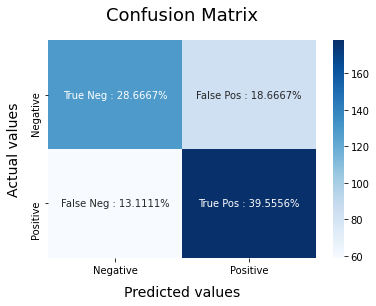

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.5, random_state =42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train = vectoriser.transform(X_train)
X_train

X_test  = vectoriser.transform(X_test)
X_test

print("Ratio 50% to 50%")

BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel,X_test,y_test)
y_pred1 = BNBmodel.predict(X_test)

cf_matrix50 = accuracy_score(y_test, y_pred1)
print("Accuracy {}".format(cf_matrix50))

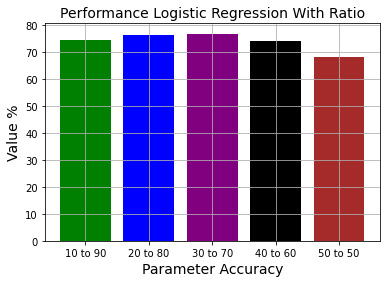

In [48]:
import matplotlib.pyplot as plt
   
params = ['10 to 90','20 to 80','30 to 70', '40 to 60', '50 to 50']
value_performace = [(cf_matrix10*100),(cf_matrix20*100),(cf_matrix30*100),(cf_matrix40*100),(cf_matrix50*100)]

New_Colors = ['green','blue','purple','black', 'brown']
plt.bar(params, value_performace, color=New_Colors)
plt.title('Performance Logistic Regression With Ratio', fontsize=14)
plt.xlabel('Parameter Accuracy', fontsize=14)
plt.ylabel('Value %', fontsize=14)
plt.grid(True)
plt.show()